# Case Study 1: PoW vs. PoS Tokens

In this study, we compare the profitability of PoW and PoS cryptocurrencies.

PoW is an older concept that is more energy intensive to operate
than PoS, which consumes a smaller amount of energy. Hence, it can
be considered a greener approach. PoW tokens can be regarded as
more secure as they are more time-tested.

## Intro

In [1]:
!python -m pip install git+https://github.com/JakRys/finclust
!pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf

def get_data(symbols, start="2020-12-01", end="2022-11-30", interval="1d",):
    data = yf.download(
        tickers=symbols,
        start=start,
        end=end,
        interval=interval,
    )
    data = data[["Adj Close", "Volume"]]
    data = data.dropna(axis=1, how="all")
    data.columns = data.columns.remove_unused_levels()
    data.columns = data.columns.set_levels([c.replace("Adj ", "") for c in data.columns.levels[0]], level=0)
    data.columns = data.columns.set_levels([c.replace("-USD", "") for c in data.columns.levels[1]], level=1)
    return data

### Create Own Clusterer

In [13]:
pow_symbols = ['BTC', 'DOGE', 'LTC', 'XMR', 'ETC', 'BCH', 'BSV', 'ZEC', 'ETHW', 'RVN', 'KDA', 'FLUX', 'SC', 'ZEN', 'DGB', 'CKB', 'SYS', 'KAS', 'ERG', 'CFX', 'HUSD', 'GRS', 'MONA', 'FIRO', 'NMC', 'BEAM', 'HTR', 'VTC', 'QRL', 'XCP', 'MWC', 'SCP', 'DIME', 'BCN', 'GRIN', 'ENQ', 'CARBON', 'WOW', 'NYAN', 'LCC', 'SIB', 'DINGO', 'ZBTCZ', 'UBQ', 'TENT', 'SCC', 'LOG', 'XPM', 'OMNI', 'GLC']
pos_symbols = ['ETH', 'ADA', 'SOL', 'TON', 'ALGO', 'XTZ', 'MINA', 'CELO', 'INJ', 'CTSI', 'VEGA', 'LTO', 'BTS', 'PART', 'PIVX', 'OXEN', 'XEP', 'MPZM', 'VAL', 'ENQ', 'SHOTO', 'NAV', 'PAC', 'NXT', 'GHOST', 'GRC', 'SUTER', 'MRX', 'BLK', 'BIS', 'XBC', 'XHI', 'DAPS', 'BLKC', 'FYD', 'CRW', 'FREED', 'ZENI', 'ION', 'RBIES', 'ATMOS', 'MOJO', 'DONU', 'ASAFE', 'VIDZ', 'POST', 'GCR', 'XPY', 'EXCL', 'DFT']

In [14]:
from typing import Dict
from finclust.clustering import Clusterer

class PowPosClusterer(Clusterer):

    def __init__(self, name: str = "") -> None:
        super().__init__(name)
        self.pow_symbols = [s.upper() for s in pow_symbols]
        self.pos_symbols = [s.upper() for s in pos_symbols]
    
    def group(self, data: pd.DataFrame) -> Dict[str, int]:
        return {c: ("PoS" if c in self.pos_symbols else ("PoW" if c in self.pow_symbols else -1)) for c in data.columns}
        

## Original Seting

Setting the  `PortfolioManager`  hyperparameters is simple in this case.
Only a few are needed.
To sort which tokens are _PoW_ and which are _PoS_, we create our
`Clusterer`. This clustering method can be performed only once on the
whole dataset, it does not depend on the `window` and `step` parameters.
The scope of the clusters does not change over time; however, the `step`
parameter affects the balancing of the ratios between cluster tokens.
We set it for _four weeks_.
We want to evaluate the baseline. It will contain all the chips used,
which means both groups. We do not need to set this up in any way,
as it is the default setting.
For evaluation, we use the predefined `QuantStatsEvaluator`. To plot
returns over time, we use the `CumulativeReturnsVisualizer`.

### Get Data

The choice of data is crucial in this case. To objectively evaluate the
whole group, it would be advisable to include as many tokens as
possible. We want to evaluate returns over as long as possible, but
some cryptocurrencies have been around for a relatively short time.
The start of their public trading is usually associated with a price spike
of hundreds of percent per day. We have selected only a few of the
most significant representatives from each category. Specifically, we
used the ten most significant tokens by capitalization according to
[Coinmarketcap](https://coinmarketcap.com/). However, we took out the DOGE coin and the TON
coin as they saw an increase of over 100% in value per day over the
period, significantly impacting the overall result. Thus, we worked
with nine tokens in each category.

We work with daily data for the two years from 1 December 2020
to 30 November 2022. The data source, in this case, is Yahoo Finance.

In [51]:
symbols = ['BTC-USD', 'LTC-USD', 'ETC-USD', 'XMR-USD', 'BCH-USD', 'BSV-USD', 'ZEC-USD', 'ETHW-USD', 'RVN-USD', 'ETH-USD', 'ADA-USD', 'SOL-USD', 'ALGO-USD', 'XTZ-USD', 'MINA-USD', 'CELO-USD', 'INJ-USD', 'CTSI-USD']
data = get_data(symbols=symbols)
data.shape

[*********************100%***********************]  18 of 18 completed


(729, 36)

### Run

In [52]:
## Import the required modules
from datetime import timedelta

from finclust import PortfolioManager
from finclust.evaluation import QuantstatsEvaluator

## Create instance of PortfolioManager
mgr_base = PortfolioManager(
    # window = timedelta(days=1),
    step = timedelta(weeks=4),
    clusterer = PowPosClusterer(),
    evaluator = QuantstatsEvaluator(as_pct=True),
)
## Run the process
mgr = mgr_base.copy()
mgr.run(data=data["Close"].fillna(method="ffill"))


15:36:40.811 Calculating returns
15:36:40.819 Calculating clusters
15:36:40.822 Calculating returns of portfolios
15:36:40.901 Evaluating baseline
15:36:41.158 Evaluating cluster portfolios
15:36:41.619 Run completed.
____________________________________
Duration of the run: 0:00:00.807848.



,Baseline,PoS,PoW
Start Period,2020-12-02,2020-12-02,2020-12-02
End Period,2022-11-29,2022-11-29,2022-11-29
Risk-Free Rate,0,0,0
Time in Market,100.0,100.0,100.0
Cumulative Return,35.34,98.83,39.86
CAGR﹪,16.41,41.21,18.34
Sharpe,0.56,0.71,0.53
Prob. Sharpe Ratio,82.76,88.33,81.56
Sortino,0.78,0.99,0.75
Sortino/√2,0.55,0.7,0.53


In [53]:
print("PoS symbols count:", len([c for c in mgr.data.columns if c in pos_symbols]))
print([c for c in mgr.data.columns if c in pos_symbols])
print("PoW symbols count:", len([c for c in mgr.data.columns if c in pow_symbols]))
print([c for c in mgr.data.columns if c in pow_symbols])

PoS symbols count: 9
['ADA', 'ALGO', 'CELO', 'CTSI', 'ETH', 'INJ', 'MINA', 'SOL', 'XTZ']
PoW symbols count: 9
['BCH', 'BSV', 'BTC', 'ETC', 'ETHW', 'LTC', 'RVN', 'XMR', 'ZEC']


### Visualizations

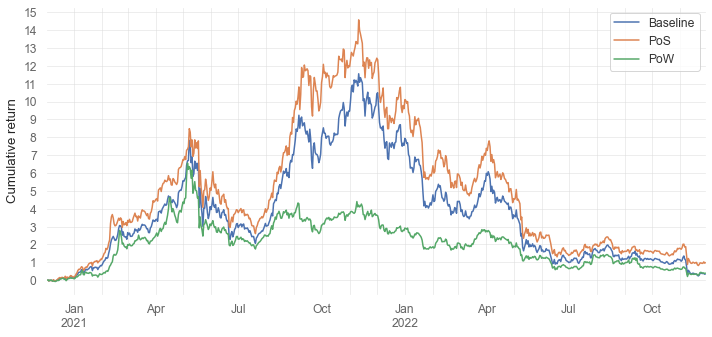

In [54]:
import matplotlib.pyplot as plt
from finclust.visualization import CumulativeReturnsVisualizator

visualizator = CumulativeReturnsVisualizator(
    figsize=(10, 5),
)

visualizator.visualize(mgr)
plt.tight_layout()
plt.xticks(pd.date_range(
    start = data.index[0],
    end = data.index[-1],
    freq = "MS",
))
plt.yticks(range(16))
plt.title("")
plt.savefig("outputs/cumret_PoW_PoS_study.pdf")
plt.show()

In [55]:
visualizator2 = CumulativeReturnsVisualizator(
    plotting_backend="plotly",
)

visualizator2.visualize(mgr)

The PoS token portfolio outperformed the PoW portfolio and the
baseline in cumulative return, size and length of average drawdown,
and length of the longest drawdown. The only thing worse was the
size of the maximum drawdown. 

The cumulative return of the PoS portfolio was the highest for most of the period. 
However, its declines were more pronounced. Thus, at the end of the period, it returned almost to the baseline value.

Note that the portfolios are rebalanced every four weeks. The baseline, composed of all tokens, is held
throughout the period without rebalancing. The number 1 on the y-axis corresponds to 100% appreciation. It may not be evident that
the PoS portfolio achieved more than twice the appreciation of the PoW portfolio.

## Weekly Rebalancing

In this section, we will try the same situation; however, we will rebalance portfolios **weekly** instead of **4 weeks** in the original setup.

## Run

In [56]:
## Copy the base setting
mgr = mgr_base.copy()

## Set the rebalancing to one week
mgr.step = timedelta(weeks=1)

## Run the process
mgr.run(data=data["Close"].fillna(method="ffill"))

15:37:16.889 Calculating returns
15:37:16.904 Calculating clusters
15:37:16.910 Calculating returns of portfolios
15:37:17.283 Evaluating baseline
15:37:17.552 Evaluating cluster portfolios
15:37:18.031 Run completed.
____________________________________
Duration of the run: 0:00:01.142001.



,Baseline,PoS,PoW
Start Period,2020-12-02,2020-12-02,2020-12-02
End Period,2022-11-29,2022-11-29,2022-11-29
Risk-Free Rate,0,0,0
Time in Market,100.0,100.0,100.0
Cumulative Return,35.34,87.9,4.11
CAGR﹪,16.41,37.26,2.04
Sharpe,0.56,0.68,0.39
Prob. Sharpe Ratio,82.76,87.45,74.25
Sortino,0.78,0.95,0.53
Sortino/√2,0.55,0.67,0.38


### Visualization

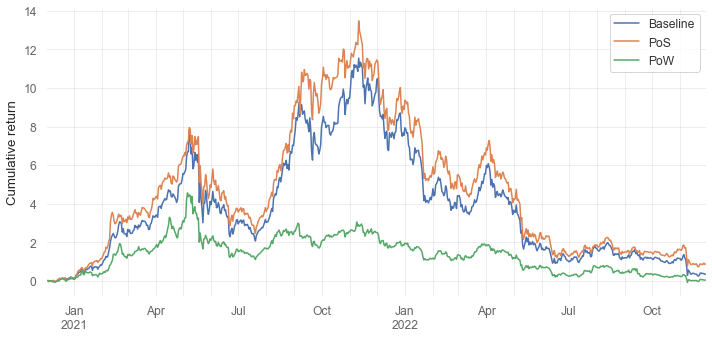

In [57]:
visualizator.visualize(mgr)
plt.tight_layout()
plt.xticks(pd.date_range(
    start = data.index[0],
    end = data.index[-1],
    freq = "MS",
))
# plt.yticks(range(16))
plt.title("")
# plt.savefig("outputs/cumret_PoW_PoS_study-weekly_rebalanc.pdf")
plt.show()

We can see that the overall trend is similar, but the cumulative
return for the PoW portfolio is now significantly lower. This example
shows that the frequency of rebalancing can have a significant impact.
Cryptocurrencies demonstrate this fact as they are highly volatile.

## With DOGE and TON Coin

In the original setup, we discarded two tokens that saw a sharp in crease in the period.
In this section, we show the result for the same
parameter settings. The data will now consist of 10 tokens from each class.

Adding one token to each cluster significantly affected the results.
The baseline values are also significantly different now. For this baseline, the effect of the increase is most noticeable as it is not rebalanced over time. Note that we have added the DOGE coin to the PoW portfolio, which has seen higher growth than the TON coin, which was added to the PoS portfolio.

### Get Data

In [58]:
symbols = ['BTC-USD', 'DOGE-USD', 'LTC-USD', 'XMR-USD', 'ETC-USD', 'BCH-USD', 'BSV-USD', 'ZEC-USD', 'ETHW-USD', 'RVN-USD', 'ETH-USD', 'ADA-USD', 'SOL-USD', 'TON-USD', 'ALGO-USD', 'XTZ-USD', 'MINA-USD', 'CELO-USD', 'INJ-USD', 'CTSI-USD']

data = get_data(symbols=symbols)

[*********************100%***********************]  20 of 20 completed


### Run

In [59]:
## Copy the base setting
mgr = mgr_base.copy()

## Run the process
mgr.run(data=data["Close"].fillna(method="ffill"))

15:37:53.272 Calculating returns
15:37:53.274 Calculating clusters
15:37:53.276 Calculating returns of portfolios
15:37:53.357 Evaluating baseline
15:37:53.586 Evaluating cluster portfolios
15:37:54.022 Run completed.
____________________________________
Duration of the run: 0:00:00.750609.



,Baseline,PoS,PoW
Start Period,2020-12-02,2020-12-02,2020-12-02
End Period,2022-11-29,2022-11-29,2022-11-29
Risk-Free Rate,0,0,0
Time in Market,100.0,100.0,100.0
Cumulative Return,170.92,81.4,142.26
CAGR﹪,64.94,34.85,55.93
Sharpe,0.84,0.67,0.78
Prob. Sharpe Ratio,92.24,86.92,91.0
Sortino,1.23,0.93,1.18
Sortino/√2,0.87,0.66,0.83


### Visualization

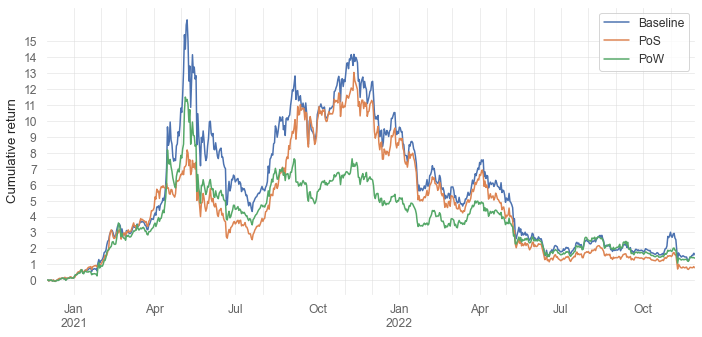

In [60]:
visualizator.visualize(mgr)
plt.tight_layout()
plt.xticks(pd.date_range(
    start = data.index[0],
    end = data.index[-1],
    freq = "MS",
))
plt.yticks(range(16))
plt.title("")
# plt.savefig("outputs/cumret_PoW_PoS_study-with_DOGE_and_TON.pdf")
plt.show()


## Portfolios with 50 Tokens

Here, we test the scope of 100 tokens (50 of each class).

### Get Data

In [61]:
pow_symbols = ['BTC', 'DOGE', 'LTC', 'XMR', 'ETC', 'BCH', 'BSV', 'ZEC', 'ETHW', 'RVN', 'KDA', 'FLUX', 'SC', 'ZEN', 'DGB', 'CKB', 'SYS', 'KAS', 'ERG', 'CFX', 'HUSD', 'GRS', 'MONA', 'FIRO', 'NMC', 'BEAM', 'HTR', 'VTC', 'QRL', 'XCP', 'MWC', 'SCP', 'DIME', 'BCN', 'GRIN', 'ENQ', 'CARBON', 'WOW', 'NYAN', 'LCC', 'SIB', 'DINGO', 'ZBTCZ', 'UBQ', 'TENT', 'SCC', 'LOG', 'XPM', 'OMNI', 'GLC']
pos_symbols = ['ETH', 'ADA', 'SOL', 'TON', 'ALGO', 'XTZ', 'MINA', 'CELO', 'INJ', 'CTSI', 'VEGA', 'LTO', 'BTS', 'PART', 'PIVX', 'OXEN', 'XEP', 'MPZM', 'VAL', 'ENQ', 'SHOTO', 'NAV', 'PAC', 'NXT', 'GHOST', 'GRC', 'SUTER', 'MRX', 'BLK', 'BIS', 'XBC', 'XHI', 'DAPS', 'BLKC', 'FYD', 'CRW', 'FREED', 'ZENI', 'ION', 'RBIES', 'ATMOS', 'MOJO', 'DONU', 'ASAFE', 'VIDZ', 'POST', 'GCR', 'XPY', 'EXCL', 'DFT']

symbols = pow_symbols + pos_symbols
symbols = [s + "-USD" for s in symbols]
print(len(symbols))

data = get_data(symbols=symbols)

100
[****************      34%                       ]  34 of 99 completedGot error from yahoo api for ticker SHOTO-USD, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[**********************69%********               ]  68 of 99 completedGot error from yahoo api for ticker MPZM-USD, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[**********************83%***************        ]  82 of 99 completedGot error from yahoo api for ticker ZBTCZ-USD, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*********************100%***********************]  99 of 99 completed

3 Failed downloads:
- SHOTO-USD: No data found for this date range, symbol may be delisted
- MPZM-USD: No data found for this date range, symbol may be delisted
- ZBTCZ-USD: No data found for this date range, symbol may be delisted


### Run

In [62]:
## Copy the base setting
mgr = mgr_base.copy()

## Run the process
mgr.run(data=data["Close"].fillna(method="ffill"))

15:38:17.450 Calculating returns
15:38:17.452 Calculating clusters
15:38:17.457 Calculating returns of portfolios
15:38:17.533 Evaluating baseline
15:38:17.796 Evaluating cluster portfolios
15:38:18.311 Run completed.
____________________________________
Duration of the run: 0:00:00.861556.



,Baseline,PoS,PoW
Start Period,2020-12-02,2020-12-02,2020-12-02
End Period,2022-11-29,2022-11-29,2022-11-29
Risk-Free Rate,0,0,0
Time in Market,100.0,100.0,100.0
Cumulative Return,104.91,58.88,813.03
CAGR﹪,43.36,26.17,203.55
Sharpe,0.59,0.59,1.33
Prob. Sharpe Ratio,97.83,97.93,99.88
Sortino,174.06,297.44,3.31
Sortino/√2,123.08,210.32,2.34


### Visualization
In this case, we have used **log scale** for y-axis.

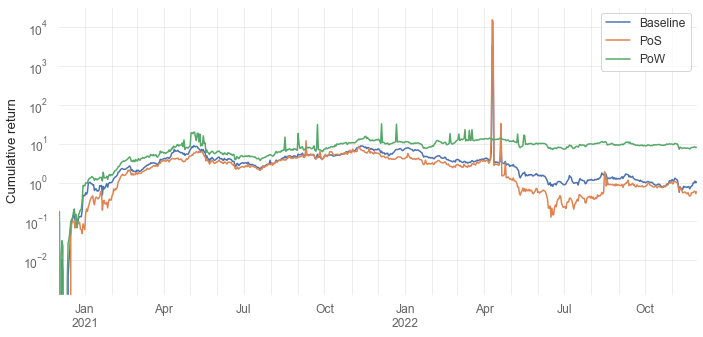

In [63]:
visualizator.visualize(mgr)
plt.tight_layout()
plt.yscale('log')
plt.xticks(pd.date_range(
    start = data.index[0],
    end = data.index[-1],
    freq = "MS",
))
plt.title("")
# plt.savefig("outputs/cumret_PoW_PoS_study-100_tokens.pdf")
plt.show()